In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df=pd.read_csv('Location1.csv')


In [3]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
df.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [7]:
df.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power'],
      dtype='object')

In [8]:
df['Time']=pd.to_datetime(df['Time'])


In [9]:
df

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606


In [10]:
df.corr()['Power'].sort_values(ascending=False)


Power                  1.000000
windspeed_100m         0.778704
windspeed_10m          0.732801
windgusts_10m          0.662677
winddirection_100m     0.171619
winddirection_10m      0.157623
relativehumidity_2m   -0.070360
temperature_2m        -0.207101
dewpoint_2m           -0.223739
Name: Power, dtype: float64

In [11]:
df=df.set_index('Time')


In [12]:
df

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336


In [13]:
df['Power']=(df['Power']-df['Power'].shift(1)).apply(lambda x:1 if x>0 else 0)


In [14]:
df

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0
...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,1
2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,1
2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,1


In [15]:
def df_to_Xy(df,lag):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df)-lag):
        rows=[[r] for r in df_as_np[i:i+lag]]
        label=df_as_np[i+lag,df.columns.get_loc('Power')]
        X.append(rows)
        y.append(label)
    return np.array(X), np.array(y)

In [16]:
X,y=df_to_Xy(df,50)


In [17]:
X.shape,y.shape


((43750, 50, 1, 9), (43750,))

In [18]:
X

array([[[[ 28.5,  85. ,  24.5, ..., 162. ,   1.4,   0. ]],

        [[ 28.4,  86. ,  24.7, ..., 158. ,   4.4,   0. ]],

        [[ 26.8,  91. ,  24.5, ..., 150. ,   3.2,   0. ]],

        ...,

        [[ 34. ,  97. ,  33.2, ..., 286. ,  11.7,   1. ]],

        [[ 33.7,  95. ,  32.3, ..., 290. ,  12.1,   1. ]],

        [[ 32.6,  95. ,  31.2, ..., 279. ,  11.7,   1. ]]],


       [[[ 28.4,  86. ,  24.7, ..., 158. ,   4.4,   0. ]],

        [[ 26.8,  91. ,  24.5, ..., 150. ,   3.2,   0. ]],

        [[ 27.4,  88. ,  24.3, ..., 105. ,   1.6,   0. ]],

        ...,

        [[ 33.7,  95. ,  32.3, ..., 290. ,  12.1,   1. ]],

        [[ 32.6,  95. ,  31.2, ..., 279. ,  11.7,   1. ]],

        [[ 32.3,  93. ,  30.6, ..., 279. ,  12. ,   1. ]]],


       [[[ 26.8,  91. ,  24.5, ..., 150. ,   3.2,   0. ]],

        [[ 27.4,  88. ,  24.3, ..., 105. ,   1.6,   0. ]],

        [[ 27.3,  88. ,  24.1, ...,  84. ,   4. ,   0. ]],

        ...,

        [[ 32.6,  95. ,  31.2, ..., 279. ,  11.7,   1.

In [19]:
train_idx=int(len(X)*0.8)
val_idx=int(len(X)*0.9)

X_train,y_train=X[:train_idx] ,y[:train_idx]
X_val,y_val=X[train_idx:val_idx], y[train_idx:val_idx]
X_test,y_test=X[val_idx:], y[val_idx:]

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_val=X_val.reshape(X_val.shape[0], X_val.shape[1], -1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((35000, 50, 9), (35000,), (4375, 50, 9), (4375,), (4375, 50, 9), (4375,))

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
from keras.optimizers import Adam

In [21]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(50, 9)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18944     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/100
547/547 [==============================] - 80s 115ms/step - loss: 0.6589 - accuracy: 0.6071 - val_loss: 0.5820 - val_accuracy: 0.7154
Epoch 2/100
547/547 [==============================] - 59s 107ms/step - loss: 0.3606 - accuracy: 0.8823 - val_loss: 0.2685 - val_accuracy: 0.9305
Epoch 3/100
547/547 [==============================] - 61s 112ms/step - loss: 0.2663 - accuracy: 0.9282 - val_loss: 0.2487 - val_accuracy: 0.9333
Epoch 4/100
547/547 [==============================] - 62s 113ms/step - loss: 0.2501 - accuracy: 0.9309 - val_loss: 0.2672 - val_accuracy: 0.9312
Epoch 5/100
547/547 [==============================] - 62s 114ms/step - loss: 0.2468 - accuracy: 0.9324 - val_loss: 0.2548 - val_accuracy: 0.9346
Epoch 6/100
547/547 [==============================] - 57s 105ms/step - loss: 0.2449 - accuracy: 0.9321 - val_loss: 0.2442 - val_accuracy: 0.9342
Epoch 7/100
547/547 [==============================] - 57s 105ms/step - loss: 0.2430 - accuracy: 0.9325 - val_loss: 0.2360 -

In [24]:
test_predictions=model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

137/137 [==============================] - 7s 17ms/step


In [25]:
from sklearn import metrics
import seaborn as sns


In [26]:
evaluation = model.evaluate(X_test, y_test)

# This will give you the loss value and accuracy on the test set
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")
print(f"f1 Score: {metrics.f1_score(test_predictions,y_test)}")


137/137 [==============================] - 2s 16ms/step - loss: 0.2436 - accuracy: 0.9275
Test Loss: 0.24359682202339172
Test Accuracy: 0.9275428652763367
f1 Score: 0.9302530253025303


<AxesSubplot:>

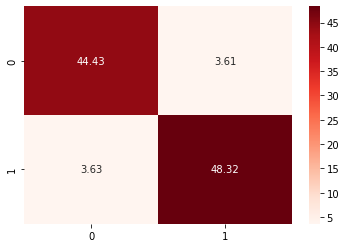

In [27]:
cm=metrics.confusion_matrix(test_predictions,y_test)
cm=(100*cm/cm.sum())

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.2f')
